In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import math
import random
from random import uniform
from sklearn import preprocessing
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn import svm

## Loading the datasets

In [2]:
# Loading the main dataset and print it
data = pd.read_csv('./arabic_dataset.csv', delimiter=";", index_col=0)
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
1,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1697,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1698,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1699,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Loading the competition set and print it
competition = pd.read_csv('./competition.csv', delimiter=";", index_col=0)

In [4]:
competition
# You should see that there are no labels in this dataset. You'll have to predict them.
# So this dataset can not be used to fit any classifier, just to make predictions with classifiers that you designed

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


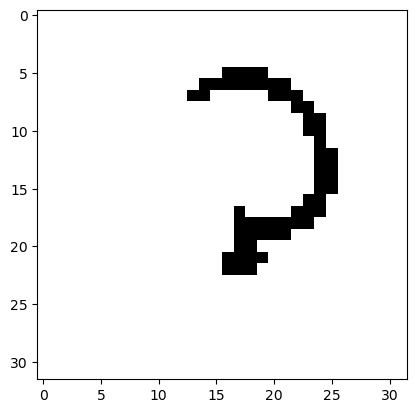

In [5]:
# Here you can see the image 0 of the dataset
idx = 0
plt.imshow(data.iloc[idx,1:].to_numpy().reshape(32,32),cmap = 'Greys')
# you can change the value of idx if you want to see another image

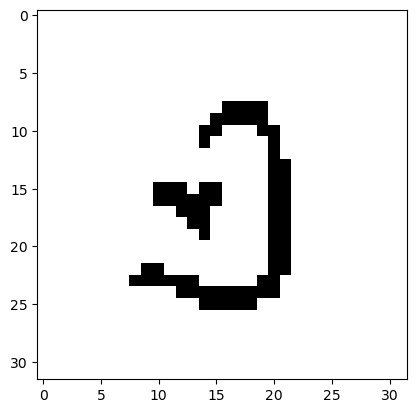

In [6]:
# Same with the image 0 of competition
idx = 0
plt.imshow(competition.iloc[idx,:].to_numpy().reshape(32,32),cmap = 'Greys')

# First guided submission to Kaggle

In [43]:
import random
pred = random.choices(np.unique(dataset.label), k=500)
pred
# pred is a vector with 500 random values from the set of possible label values 
# we will assume that these are our 500 predictions for the competition set

NameError: name 'dataset' is not defined

In [29]:
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = pred
df

,Id,label
0,1,6
1,2,16
2,3,18
3,4,12
4,5,6
...,...,...
495,496,12
496,497,1
497,498,2
498,499,22


In [30]:
# then save it to a csv file
df.to_csv('myfirstsubmission.csv', index=False)
# You should now have a csv file on your working directory
# Go on Kaggle website, join the competition and drag this file into 'Submit predictions'. You should have a score
# This score might not be high because we have just done random predictions
# but when you'll design classifiers and make more clever predictions you will improve your score
# Later, when you'll have found an interesting classifier for each family, you have to predict the competition set
# with this classifier, put these predictions into a vector (like pred above) and apply the same procedure as
# in the previous cell

## Part 1 : preliminar analysis of the dataset

# Description et analyse du jeu de données

In [7]:
print('Number of examples', data.shape[0])
print('Number of features', data.shape[1]-1)
print("Distribution de la variable de sortie label :\n",  data['label'].value_counts())

Number of examples 1700
Number of features 1024
Distribution de la variable de sortie label :
 label
12    255
6     250
22    245
18    241
1     238
2     238
16    233
Name: count, dtype: int64


# Train / Valid / Test Split
On commmence par diviser notre jeu de données en données d'apprentissage de validation et de test, cette division sera adoptée pour tous les models évalués
Nous allons suivre la méthode enseignée en cours pour construire et évaluer la performance de nos modèles de classification. Cette méthode implique la division du jeu de données disponible en trois parties distinctes :
- Données d'apprentissage (70 %) : Ces données constitueront la base sur laquelle nous construirons nos modèles de classification. 

- Données de validation (15 %) : Cette partie des données sera utilisée pour évaluer les performances de généralisation de nos modèles. 

- Données de test (15 %) : Ces données seront réservées à l'évaluation finale de l'erreur de généralisation de nos modèles.


In [4]:
data_train, data_test = train_test_split(data, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)

## Part 2 : classifiers based on raw images

### Decision trees
Dans cette partie, nous allons évaluer la performance des arbres de décision sur notre jeu de données. Pour ce faire nous allons construire des arbres à différents niveaux d’élagages. 
- On commence calculer les niveaux d’élagages posisbles pour notre jeu de données 

- Pour chaque  niveau d’élagage (k), nous l’ajusterons aux données d’apprentissage. Par la suite nous estimons l’erreur de validation sur les données de validation. Enfin, nous estimerons l’erreur de généralisation du meilleur arbre sur les données de test. 


[Text(0.8608030136336862, 0.9827586206896551, 'x[689] <= 0.5\ngini = 0.857\nsamples = 1190\nvalue = [157, 158, 184, 177, 168, 169, 177]'),
 Text(0.7645024863950576, 0.9482758620689655, 'x[486] <= 0.5\ngini = 0.85\nsamples = 934\nvalue = [151, 107, 176, 99, 94, 159, 148]'),
 Text(0.6905412882369673, 0.9137931034482759, 'x[754] <= 0.5\ngini = 0.849\nsamples = 851\nvalue = [98, 107, 166, 99, 88, 147, 146]'),
 Text(0.6113438988955844, 0.8793103448275862, 'x[783] <= 0.5\ngini = 0.838\nsamples = 711\nvalue = [95, 64, 164, 81, 57, 144, 106]'),
 Text(0.5583150646004312, 0.8448275862068966, 'x[626] <= 0.5\ngini = 0.82\nsamples = 611\nvalue = [94, 43, 163, 53, 42, 141, 75]'),
 Text(0.5158675513156212, 0.8103448275862069, 'x[848] <= 0.5\ngini = 0.796\nsamples = 519\nvalue = [75, 40, 158, 38, 21, 135, 52]'),
 Text(0.4782151547097322, 0.7758620689655172, 'x[913] <= 0.5\ngini = 0.785\nsamples = 497\nvalue = [75, 34, 158, 37, 21, 135, 37]'),
 Text(0.4207658436889705, 0.7413793103448276, 'x[562] <= 0.

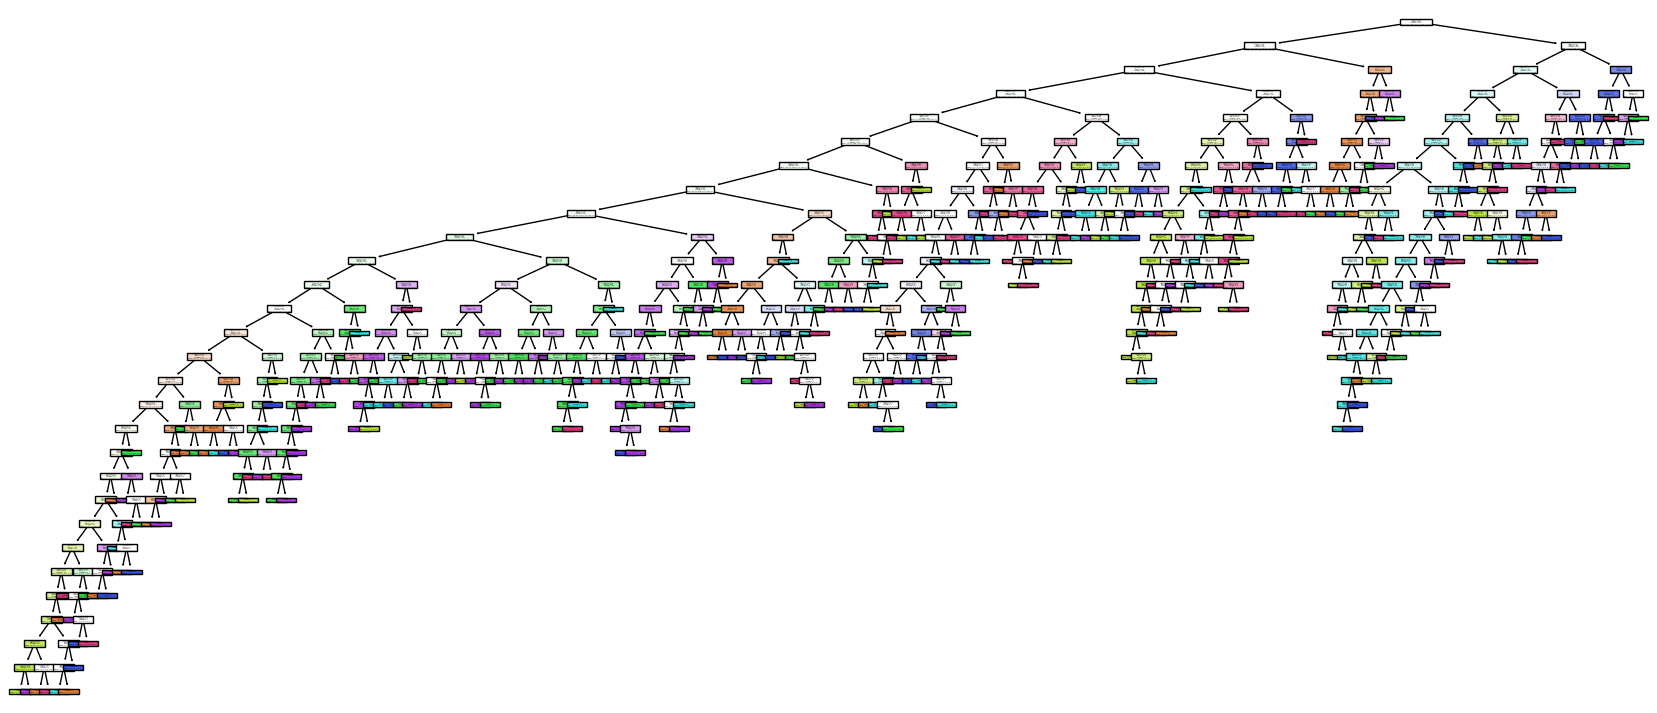

In [9]:
#Arbre complet 
dt = tree.DecisionTreeClassifier().fit(data_train.iloc[:,1:],data_train.label)
#Visualisation de l'arbre 
plt.figure(figsize=(21, 9))
tree.plot_tree(dt, filled=True) 

### évaluation de la performance de l'abre complet 


In [10]:
#Evaluation de la performance de l'arbre complet 
print('Erreur empirique (sur les données d''apprentissage)',1-dt.score(data_train.iloc[:,1:], data_train['label']))
print('Erreur de validation (sur les données de validation)',1-dt.score(data_valid.iloc[:,1:], data_valid['label']))
print('Erreur de généralisation (sur les données de test)',1-dt.score(data_test.iloc[:,1:], data_test['label']))

Erreur empirique (sur les données dapprentissage) 0.0
Erreur de validation (sur les données de validation) 0.4784313725490196
Erreur de généralisation (sur les données de validation) 0.49411764705882355


### Observation 
On observe que l'erreur emprique est nulle, tandis que l'erreur sur les données de validation et de test est élevée. Ceci correspond à phénomène de surapprentissage. 
Nous allons maintenant essayer de réduire cette erreur par la procédure d'élagage. 

## élagage de l'arbre


In [15]:
#Déclaration de l'arbre
clf = tree.DecisionTreeClassifier() 
#Calcul des valeurs possibles de alpha (niveau d'élagage)
path = clf.cost_complexity_pruning_path(data_train.iloc[:,1:], data_train.label)
print('Nombre d''élagage possibles = ',len(path.ccp_alphas))

Nombre délagage possibles =  251


#### Nous allons maintenant évaluer les perfomances arbres élaguées à travers une boucle en parcourant toute les valeurs possibles de alpha 

In [17]:
#performance on the training set
train_errors = [] 
#performance on the validation set
valid_errors  = []
#performance on the test set
test_errors  = []
# Initialiser l'erreur de validation minimale à l'infini pour la comparer par laa suite et récupérer le alpha qui minimise l'erreur de validaiton
best_perf_tree = float('inf')  
best_alpha = None
# Boucle for pour créer et évaluer les modèles élagués
for ccp_alpha in path.ccp_alphas:
    dt_pruned = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    dt_pruned.fit(data_train.iloc[:,1:], data_train['label'])
    #plt.figure(figsize=(21, 9))
    #tree.plot_tree(dt_pruned, filled=True)
    # Calcul de l'erreur sur les données d'entraînement et de validation et de test 
    train_error  = 1-dt_pruned.score(data_train.iloc[:,1:], data_train['label'])
    valid_error  = 1-dt_pruned.score(data_valid.iloc[:,1:], data_valid['label'])
    test_error = 1-dt_pruned.score(data_test.iloc[:,1:], data_test['label'])
    #draw_boundary_tree(dt_pruned, data_train, -1.2, 1.2, -1.2, 1.2)
    # Ajoutez les scores à leurs listes respectives
    train_errors.append(train_error)
    valid_errors.append(valid_error)
    test_errors.append(test_error)
    # Check if this alpha gives a lower validation error
    if valid_error < best_perf_tree :
        best_perf_tree = valid_error
        best_alpha = ccp_alpha

### Performance des arbres de décision
- On résume à travers le tableau ci-dessous les performances de nos arbres de décision

In [18]:
results_df = pd.DataFrame({
    'Alpha': path.ccp_alphas,
    'Erreur Apprentissage': train_errors,
    'Erreur validation': valid_errors,
    'Erreur généralisation' : test_errors
})

# Affichez le tableau des résultats
print(results_df)

        Alpha  Erreur Apprentissage  Erreur validation  Erreur généralisation
0    0.000000              0.000000           0.482353               0.462745
1    0.000780              0.000840           0.478431               0.447059
2    0.000788              0.001681           0.494118               0.486275
3    0.000800              0.002521           0.482353               0.505882
4    0.000815              0.003361           0.517647               0.482353
..        ...                   ...                ...                    ...
246  0.012158              0.690756           0.721569               0.729412
247  0.016280              0.715966           0.749020               0.760784
248  0.017514              0.750420           0.776471               0.792157
249  0.021121              0.786555           0.819608               0.815686
250  0.024518              0.845378           0.878431               0.862745

[251 rows x 4 columns]


## Résultats obtenus 

In [20]:
print ('Le meilleur model est obtenu avec l''elagage alpha =', best_alpha)
print('L"erreur de généralisation du meilleur arbre = ' , best_perf_tree)

Le meilleur model est obtenu avec lelagage alpha = 0.0008403361344537816
L"erreur de généralisation du meilleur arbre =  0.4549019607843138


# Discussion des résultats 
On remarque que l'erreur de généralisation pour le meilleur arbre a diminué comparé à l'arbre complet utilisé au début. Cependant la performance du modèle est faible car l'erreur reste importante 

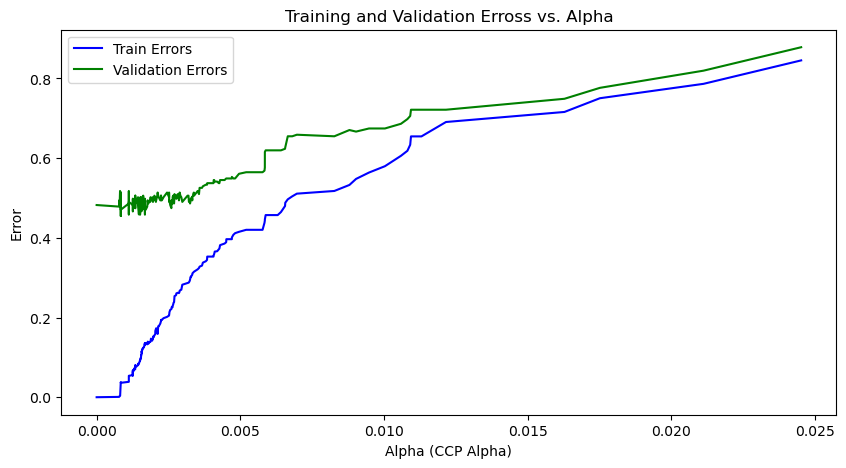

In [22]:
plt.figure(figsize=(10, 5))  
# Score sur les données d'apprentissage
plt.plot(path.ccp_alphas, train_errors,  label='Train Errors', color='blue')
# Score sur les données de validation
plt.plot(path.ccp_alphas, valid_errors,  label='Validation Errors', color='green')
plt.xlabel('Alpha (CCP Alpha)')
plt.ylabel('Error')
plt.title('Training and Validation Erross vs. Alpha')
plt.legend()
plt.show()

### Prédictions avec le meilleur arbre obtenu 

In [28]:
best_dt_pruned = tree.DecisionTreeClassifier(ccp_alpha=best_alpha)
#NOUBLIE PAS LES PARAMETRES
best_dt_pruned.fit(data_train.iloc[:,1:], data_train['label'])
# Effectuez des prédictions sur le jeu de données 'competition'
competition_predictions = best_dt_pruned.predict(competition.iloc[:,:])
# Créez un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(np.arange(1,501), columns=['Id'])
predictions_df['label'] = competition_predictions
predictions_df


# Enregistrez les prédictions dans un fichier CSV
predictions_df.to_csv('prediction_decision_tree.csv', index=False)

### SVM

#### Dans cette partie, nous allons évaluer la performance des arbres de décision sur notre jeu de données. Pour ce faire nous allons construire des modèles avec différentes marges et différents noyaux (Linéaire, Gaussien, Polynomial). 


### SVM à noyau Linéaire 
- On vas essayer un SVM avec un noyau linéraire et différents degrés de marges (C) 
- Les valeurs testés de C sont [0.01, 0.1, 1, 10, 100, 1000]

In [31]:
#performance on the training set
train_errors = [] 
#performance on the validation set
valid_errors  = []
#performance on the test set
test_errors  = []

best_error = float('inf')  
best_C = None  

C_values = [0.01, 0.1, 1, 10, 100, 1000]

# Boucle pour tester différentes valeurs de C
for C in C_values:
    # Créez un modèle SVM avec le paramètre C actuel
    model_svm = svm.SVC(C=C, kernel='linear')
    
    # Entraînement du modèle
    model_svm.fit(data_train.iloc[:, 1:], data_train.label)
    # Calcul de l'erreur empirique 
    train_error = 1 - model_svm.score(data_train.iloc[:, 1:], data_train.label)

    # Calcul de l'erreur de validation
    valid_error = 1 - model_svm.score(data_valid.iloc[:, 1:], data_valid.label)
    
    # Calcul de l'erreur de généralisation
    test_error = 1 - model_svm.score(data_test.iloc[:, 1:], data_test.label)
    
    # Ajoutez les scores à leurs listes respectives
    train_errors.append(train_error)
    valid_errors.append(valid_error)
    test_errors.append(test_error)
    
    #Comparaison de l'erreur de validation
    if valid_error < best_error:
        best_error = valid_error
        best_C = C

print("La marge la mieux adaptée à ce modèle est C =  :", best_C)
print("Erreur minimale de validation obtenue pour cette marge est de :", best_error)

La marge la mieux adaptée à ce modèle est C =  : 0.1
Erreur minimale de validation obtenue pour cette marge est de : 0.24705882352941178


### évaluation des performances du SVM avec noyau linéraire
Voici le résumé de la performance du SVM avec noyau linéaire et différentes marges

In [32]:
results_df = pd.DataFrame({
    'C': C_values,
    'Erreur Apprentissage': train_errors,
    'Erreur validation': valid_errors,
    'Erreur généralisation' : test_errors
})

# Affichez le tableau des résultats
print(results_df)

         C  Erreur Apprentissage  Erreur validation  Erreur généralisation
0     0.01              0.180672           0.262745               0.278431
1     0.10              0.047059           0.247059               0.243137
2     1.00              0.000000           0.321569               0.298039
3    10.00              0.000000           0.321569               0.298039
4   100.00              0.000000           0.321569               0.298039
5  1000.00              0.000000           0.321569               0.298039


### Observations 
- On remarque que plus on augmente C et plus le modèle est performant sur les données d'apprentissage 
- Notre meilleur modèle est obtenu avec un C= 0.1 (marge souple), pour le quel on obtient une erreur de généralisation  0.243137 
- Les résultats sont nettement meilleurs que ceux obtenus avec les arbres de décision 

### Prédictions avec SVM et meilleure marge


In [43]:
model_svm = svm.SVC(C=best_C, kernel='linear')
model_svm.fit(data_train.iloc[:, 1:], data_train.label)
competition_pred = model_svm.predict(competition.iloc[:,:])
# Créez un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(np.arange(1,501), columns=['Id'])
predictions_df['label'] = competition_pred
predictions_df

# Enregistrez les prédictions dans un fichier CSV
predictions_df.to_csv('prediction_SVM_linear.csv', index=False)

### à la soumission de nos prédictions on remarque qu'on obtient un meilleur score sur nos prédictions qu'avec les arbres de décision

# SVM Avec noyau Gaussien (RBF)
- On vas essayer un SVM avec un noyau gaussien et différents degrés de marges (C), et différentes valeurs de gamma
- Les valeurs testées de C sont [0.01, 0.1, 1, 10, 100, 1000] 
- Les valeurs testées de gamma sont [0.01, 0.1, 1, 10, 100]

In [44]:
#performance on the training set
train_errors = [] 
#performance on the validation set
valid_errors  = []
#performance on the test set
test_errors  = []

best_error = float('inf') 
best_C = None  
best_gamma = None  

# Listes des valeurs de C et de gamma à tester
C_values = [0.01, 0.1, 1, 10, 100, 1000]
gamma_values = [0.01, 0.1, 1, 10, 100]

results = []  # Liste pour stocker les résultats finaux

# Combinaisons de C et de gamma
for C in C_values:
    for gamma in gamma_values:
        # Créez un modèle SVM avec les paramètres C et gamma actuels
        model_svm = svm.SVC(C=C, kernel='rbf', gamma=gamma)
        # Entraîner le modèle
        model_svm.fit(data_train.iloc[:, 1:], data_train.label)
        
        # Calcul de l'erreur empirique 
        train_error = 1 - model_svm.score(data_train.iloc[:, 1:], data_train.label)

        # Calcul de l'erreur de validation
        valid_error = 1 - model_svm.score(data_valid.iloc[:, 1:], data_valid.label)

        # Calcul de l'erreur de généralisation
        test_error = 1 - model_svm.score(data_test.iloc[:, 1:], data_test.label)

        train_errors.append(train_error)
        valid_errors.append(valid_error)
        test_errors.append(test_error)
        
        # Si l'erreur de validation actuelle est la meilleure jusqu'à présent, mettez à jour les variables
        if valid_error < best_error:
            best_error = valid_error
            best_C = C
            best_gamma = gamma
        results.append([C, gamma, train_error, valid_error, test_error])

results_df = pd.DataFrame(results, columns=['C', 'gamma', 'Train Error', 'Validation Error', 'Test Error'])


print("Meilleur C :", best_C)
print("Meilleur gamma :", best_gamma)
print("Erreur minimale de généralisation :", best_error)

Meilleur C : 10
Meilleur gamma : 0.01
Erreur minimale de validation : 0.19999999999999996


### Résultats obtenus 
- Les meilleures performances sur noyau gaussien sont obtenues avec une marge de C=10 et un gamma = 0.01 
- Notre meilleur modèle donne une erreur de généralisation = 0.160784
- Cette erreur de généralisation est plus petite que celle obetnue avec un noyau linéaire. 
- Il semblerait donc que le noyau gaussien est plus adapté à notre jeu de données 

Les résultats des différentes combinaisons posisbles est résumé dans le tableau ci-dessous 


In [48]:
results_df

,C,gamma,Train Error,Validation Error,Test Error
0,0.01,0.01,0.845378,0.878431,0.862745
1,0.01,0.10,0.845378,0.878431,0.862745
2,0.01,1.00,0.845378,0.878431,0.862745
3,0.01,10.00,0.845378,0.878431,0.862745
4,0.01,100.00,0.845378,0.878431,0.862745
5,0.10,0.01,0.533613,0.552941,0.607843
6,0.10,0.10,0.845378,0.878431,0.862745
7,0.10,1.00,0.845378,0.878431,0.862745
8,0.10,10.00,0.845378,0.878431,0.862745
9,0.10,100.00,0.845378,0.878431,0.862745


### Prédictions avec SVM  à noyau gossien et meilleurs marge (10) et gamma (0.01)


In [47]:
model_svm_rbf = svm.SVC(C=10,gamma=0.01, kernel='rbf')
model_svm_rbf.fit(data_train.iloc[:, 1:], data_train.label)
competition_pred = model_svm_rbf.predict(competition.iloc[:,:])
# Créez un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(np.arange(1,501), columns=['Id'])
predictions_df['label'] = competition_pred
predictions_df

# Enregistrez les prédictions dans un fichier CSV
predictions_df.to_csv('prediction_SVM_rbf.csv', index=False)

### Après soumission de nos résultats sur Kaggle on améliore notre score. Le noyau gaussien est donc plus adapté à notre jeu de données. 

# SVM Avec noyau polynomial
- On vas essayer un SVM avec un noyau polynomial et différents degrés de marges (C), et différents degrés (d)
- Les valeurs testées de C sont [0.01, 0.1, 1, 10, 100, 1000] 
- Les valeurs testées de gamma sont [1, 2, 5, 6, 9,10,20]

In [49]:
#performance on the training set
train_errors = [] 
#performance on the validation set
valid_errors  = []
#performance on the test set
test_errors  = []

best_error = float('inf')  
best_C = None  
best_d = None 


# Listes des valeurs de C et de d à tester
C_values = [0.01, 0.1, 1, 10, 100, 1000]
d_values = [1, 2, 5, 6, 9,10,20]

results = []  # Liste pour stocker les résultats finaux

#  combinaisons de C et de d
for C in C_values:
    for d in d_values:
        model_svm = svm.SVC(C=C, kernel='poly', degree=d)
        
        model_svm.fit(data_train.iloc[:, 1:], data_train.label)
        
        # Calcul de l'erreur empirique 
        train_error = 1 - model_svm.score(data_train.iloc[:, 1:], data_train.label)

        # Calcul de l'erreur de validation
        valid_error = 1 - model_svm.score(data_valid.iloc[:, 1:], data_valid.label)

        # Calcul de l'erreur de généralisation
        test_error = 1 - model_svm.score(data_test.iloc[:, 1:], data_test.label)

        # Ajoutez les scores à leurs listes respectives
        train_errors.append(train_error)
        valid_errors.append(valid_error)
        test_errors.append(test_error)
        
        # Si l'erreur de validation actuelle est la meilleure jusqu'à présent, mettez à jour les variables
        if valid_error < best_error:
            best_error = valid_error
            best_C = C
            best_d = d
          # Stockez les résultats actuels dans la liste "results"
        results.append([C, d, train_error, valid_error, test_error])

print("Meilleur C :", best_C)
print("Meilleur degré :", best_d)
print("Meilleure erreur de validation :", best_error)

Meilleur C : 10
Meilleur degré : 2
Meilleur score de validation : 0.1568627450980392


# Résultats obtenus 
- Les meilleures performances sur noyau polynomial sont obtenues avec une marge de C=10 et un degré d = 2 
- Notre meilleur modèle donne une erreur de généralisation = 0.129412
- Cette erreur de généralisation est plus petite que celle obetnue avec un noyau linéaire ou gaussine. 
- Il semblerait donc que le noyau polynomial soit le plus adapté à ce jeux de données 

Les résultats des différentes combinaisons posisbles est résumé dans le tableau ci-dessous 


In [51]:
results_df = pd.DataFrame(results, columns=['C', 'degré', 'Erreur empirique', 'Erreur de validation', 'Erreur de généralisation'])
results_df

,C,degré,Erreur empirique,Erreur de validation,Erreur de généralisation
0,0.01,1,0.845378,0.878431,0.862745
1,0.01,2,0.845378,0.878431,0.862745
2,0.01,5,0.835294,0.878431,0.862745
3,0.01,6,0.825210,0.878431,0.862745
4,0.01,9,0.698319,0.807843,0.854902
5,0.01,10,0.707563,0.819608,0.870588
6,0.01,20,0.619328,0.882353,0.803922
7,0.10,1,0.327731,0.356863,0.372549
8,0.10,2,0.368908,0.435294,0.466667
9,0.10,5,0.559664,0.705882,0.745098


## Prédictions avec SVM  à noyau polynomial et meilleurs marge (10) et degré (2)


In [52]:
model_svm = svm.SVC(C=10, kernel='poly', degree=2)
model_svm_rbf.fit(data_train.iloc[:, 1:], data_train.label)
competition_pred = model_svm_rbf.predict(competition.iloc[:,:])
# Créez un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(np.arange(1,501), columns=['Id'])
predictions_df['label'] = competition_pred
predictions_df
# Enregistrez les prédictions dans un fichier CSV
predictions_df.to_csv('prediction_SVM_poly.csv', index=False)

### K-nearest-neighbour
#### Dans cette partie, nous allons évaluer la performance des K- plus proches voisins sur notre jeu de données. 
#### Pour ce faire nous allons construire des modèles en variant le nombre de plus proches voisins k à chaque fois 
#### On commence par un modèle de 1-NN


In [53]:
#performance on the training set
train_errors = [] 
#performance on the validation set
valid_errors  = []
#performance on the test set
test_errors  = []

k_values=[1,2,3,4,5,6,7,8,9,10,15,20,25,28,30]

# Liste pour stocker les résultats
results = []

best_valid_error = float('inf')
best_k = None

# Boucle for pour créer et évaluer les modèles élagués
for k in k_values:
    n_n = KNeighborsClassifier(n_neighbors=k) 
    # N'OUBLIE PAS LES PARAMETRES

    n_n.fit(data_train.iloc[:,1:],data_train.label)
    # Calculez le score sur les données d'entraînement et de validation

    train_error = 1-n_n.score(data_train.iloc[:,1:].values, data_train['label'])

    valid_error = 1-n_n.score(data_valid.iloc[:,1:].values, data_valid['label'])

    test_error = 1-n_n.score(data_test.iloc[:,1:].values, data_test['label'])
    
     # Ajoutez les scores à leurs listes respectives
    train_errors.append(train_error)
    valid_errors.append(valid_error)
    test_errors.append(test_error)
    # Ajouter les résultats à la liste des résultats
    results.append([k, train_error, valid_error, test_error])
    
    # Mettre à jour la meilleure erreur de validation et la meilleure valeur de k
    if valid_error < best_valid_error:
        best_valid_error = valid_error
        best_k = k
# Afficher le k avec la plus petite erreur de validation
print("Meilleur k :", best_k)
print("Erreur de validation pour le meilleur model obtenu  :", best_valid_error)

C:\Anaconda\envs\FSY\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\FSY\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\FSY\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\FSY\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\FSY\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\FSY\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have v

Meilleur k : 1
Erreur de validation pour le meilleur model obtenu  : 0.25098039215686274


C:\Anaconda\envs\FSY\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\envs\FSY\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Résultats obtenues 
- Le modèle qui performe le mieux est 1-NN
- On obtient pour ce modèle une erreur de validation de 0.25 
- Cependant, ce modèle est moins performant que les SVM, l'erreur de généralisation de 0.27 est plus grande que celle obtenue précédement 

## Résumé des résultats obtenus avec K-nn

In [54]:
results_df = pd.DataFrame(results, columns=['k', 'Erreur empirique', 'Erreur de validation', 'Erreur de généralisation'])
print(results_df)

     k  Erreur empirique  Erreur de validation  Erreur de généralisation
0    1          0.000000              0.250980                  0.270588
1    2          0.223529              0.352941                  0.356863
2    3          0.181513              0.317647                  0.301961
3    4          0.228571              0.349020                  0.333333
4    5          0.225210              0.333333                  0.337255
5    6          0.263025              0.360784                  0.341176
6    7          0.264706              0.368627                  0.329412
7    8          0.275630              0.364706                  0.341176
8    9          0.294958              0.360784                  0.337255
9   10          0.298319              0.345098                  0.356863
10  15          0.352941              0.407843                  0.380392
11  20          0.400840              0.439216                  0.396078
12  25          0.423529              0.450980     

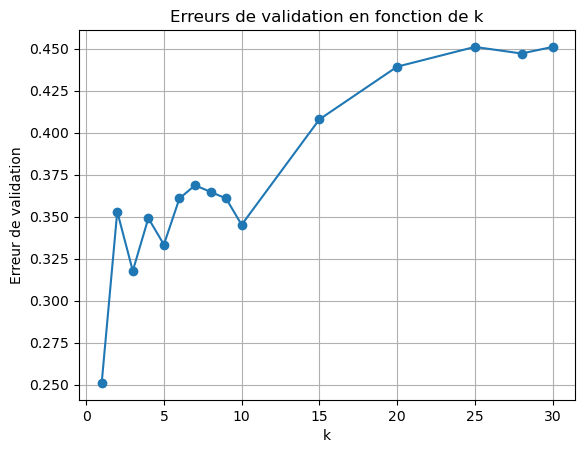

In [57]:
import matplotlib.pyplot as plt

plt.plot(k_values, valid_errors, marker='o', linestyle='-')
plt.title('Erreurs de validation en fonction de k')
plt.xlabel('k')
plt.ylabel('Erreur de validation')
plt.grid(True)
plt.show()

### Autres observation 
à partir du graphe on observe qu'après le 1-NN, le 3-NN donne les meilleurs résultats parmis k>1 

## Prédictions 1-NN


In [59]:
one_n = KNeighborsClassifier(n_neighbors=1) 
one_n.fit(data_train.iloc[:,1:],data_train.label)
competition_pred = one_n.predict(competition.iloc[:,:].values)
# Créer un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(np.arange(1,501), columns=['Id'])
predictions_df['label'] = competition_pred
predictions_df
# Enregistrez les prédictions dans un fichier CSV
predictions_df.to_csv('prediction_KNN_1.csv', index=False)

C:\Anaconda\envs\FSY\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Autres observations  

#### Après avoir effectué les prédictions sur Kaggle on constate que notre score a diminué comparé à SVM

### Random forest
##### Dans cette partie, nous allons évaluer la performance des fôrets aléatoires sur notre jeu de données. 
##### Pour ce faire nous allons construire des modèles en variant le nombre d'arbres à chaque fois  
##### Le nombre d'arbres pris à chaque fois est tiré de ce vecteur de valeurs : [10,20,50,100,150,200,300,500] 

In [60]:
#performance on the training set
train_errors = [] 
#performance on the validation set
valid_errors  = []
#performance on the test set
test_errors  = []
# Liste pour stocker les résultats
results = []

best_valid_error = float('inf')
best_n_estimators = None
nbr_trees=[10,20,50,100,150,200,300,500]

# Boucle for pour créer et évaluer les fôrets
for nbr in nbr_trees:
    r_f = RandomForestClassifier(n_estimators=nbr) 
    r_f.fit(data_train.iloc[:,1:],data_train.label)
    # Calculez le score sur les données d'entraînement et de validation

    train_error = 1- r_f.score(data_train.iloc[:,1:], data_train['label'])

    valid_error = 1- r_f.score(data_valid.iloc[:,1:], data_valid['label'])

    test_error = 1- r_f.score(data_test.iloc[:,1:], data_test['label'])
    results.append([nbr, train_error, valid_error, test_error])

    train_errors.append(train_error)
    valid_errors.append(valid_error)
    test_errors.append(test_error)
    
    if valid_error < best_valid_error:
        best_valid_error = valid_error
        best_nbr_trees = nbr
# Afficher le nbr avec la plus petite erreur de validation
print("Meilleur nombre de fôrets  :", best_nbr_trees)
print("Erreur de validation pour le meilleur model obtenu  :", best_valid_error)

Meilleur nombre de fôrets  : 300
Erreur de validation pour le meilleur model obtenu  : 0.16470588235294115


### Récapitulatif des perfomances des forêts aléatoires 

In [61]:
results_df = pd.DataFrame(results, columns=['Nombre Arbres', 'Erreur empirique', 'Erreur de validation','Erreur de generalisation'])
print(results_df)

   Nombre Arbres  Erreur empirique  Erreur de validation  \
0             10          0.006723              0.290196   
1             20          0.000840              0.258824   
2             50          0.000000              0.211765   
3            100          0.000000              0.211765   
4            150          0.000000              0.192157   
5            200          0.000000              0.200000   
6            300          0.000000              0.164706   
7            500          0.000000              0.180392   

   Erreur de generalisation  
0                  0.301961  
1                  0.223529  
2                  0.219608  
3                  0.211765  
4                  0.200000  
5                  0.203922  
6                  0.196078  
7                  0.192157  


### Observations 
- Le meilleur model est obtenu avec une fôret de 300 arbres 
- Pour ce modèle on obtient un erreur de validation de 0.16 
- L'erreur de généralisation du meilleur arbre est de 0.19 
- On peut conclure que les fôrets aléatoires performent bien sur notre jeu de données

### Prédictions avec une fôret à 300 arbres 

In [23]:
best_r_f = RandomForestClassifier(n_estimators=300) 
best_r_f.fit(data_train.iloc[:,1:],data_train.label)
competition_pred = best_r_f.predict(competition.iloc[:,:].values)
# Créer un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(np.arange(1,501), columns=['Id'])
predictions_df['label'] = competition_pred
predictions_df
# Enregistrez les prédictions dans un fichier CSV
predictions_df.to_csv('prediction_RF_300.csv', index=False)

C:\Anaconda\envs\FSY\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Logistic regression
Pour notre jeu de données, nous avons à faire à une classification multiclasse, nous allons tester des modèles de regression logistique tout d'abord sans transfromation polynomiale puis avec transformation polynomiale. 

In [64]:
#Modèle de regression logistique sans transfromation polynomiale 
#On fixe max iter à 1000 afin que notre modèle converge 
lg_regression = LogisticRegression(multi_class='multinomial', max_iter=1000).fit(data_train.iloc[:,1:], data_train.label)
# Calculez les erreurs sur les données d'entraînement et de validation
train_error = 1- lg_regression.score(data_train.iloc[:,1:], data_train['label'])

valid_error = 1- lg_regression.score(data_valid.iloc[:,1:], data_valid['label'])

test_error = 1- lg_regression.score(data_test.iloc[:,1:], data_test['label'])
print('Erreur emprique', train_error)
print('Erreur apprentissage', valid_error)
print('Erreur de généralisation', test_error)

Erreur emprique 0.005042016806722671
Erreur apprentissage 0.30980392156862746
Erreur de généralisation 0.29803921568627456


### Observation 
- En utilisant un modèle de regression logistique de base, on obtient une erreur de généralisation de 0.29. Ce modèle de regression logstique ne performe pas aussi bien que les précédents. 
- Afin d'améliorer les performances nous allons tenter d'effectuer une transformation polynomiale à notre jeu de données et de réstimer l'erreur. 
- Nous allons tenter d'essayer différents degrés 2, 5 

## Transformation polynomiale de jeu de données 

#### Degré 2 

In [19]:
#Degrée = 2 
poly = PolynomialFeatures(degree = 2)
data_train2 = poly.fit_transform(data_train.iloc[:,1:])
data_valid2 = pd.DataFrame(poly.fit_transform(data_valid.iloc[:,1:]))
data_test2 = pd.DataFrame(poly.fit_transform(data_test.iloc[:,1:]))

data_train_tranf = pd.DataFrame(data_train2)
data_train_valid = pd.DataFrame(data_valid2)
data_test_tranf = pd.DataFrame(data_test2)


In [13]:
#Création du modèle 
lr_model2 = LogisticRegression(multi_class='multinomial', max_iter=1000).fit(data_train2, data_train.label)


In [20]:
train_error = 1- lr_model2.score(data_train_tranf.iloc[:,:], data_train['label'])
print("Erreur empirique", train_error)
print("Erreur de validation = ", 1- lr_model2.score(data_train_valid.iloc[:,:], data_valid['label']))
print("Erreur de généralisation = ", 1- lr_model2.score(data_test_tranf.iloc[:,:], data_test['label']))

Erreur empirique 0.0
Erreur de validation =  0.1686274509803921
Erreur de généralisation =  0.14117647058823535


### Observations 
- En appliquant une transformation polynomiale de degré 2 à notre jeu de données les performanaces de notres modèles se sont améliorées avec une erreur de généralisation de 0.14
- Cependant, vu les capacités limitées de la maachine nous avons pas pu appliquer des transformations de degrés > 2 

### Prédictions avec régression logistique avec transformation polynomiale de degré 2  

In [28]:
poly = PolynomialFeatures(degree = 2)
competition2 = poly.fit_transform(competition.iloc[:,:])
competition_tranf = pd.DataFrame(competition2)
competition_pred = lr_model2.predict(competition_tranf.iloc[:,:].values)
# Créer un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(np.arange(1,501), columns=['Id'])
predictions_df['label'] = competition_pred
predictions_df
# Enregistrez les prédictions dans un fichier CSV
predictions_df.to_csv('prediction_LR_2.csv', index=False)


## Part 3 : using HOG representation
- On transforme notre image on des blocs de 16*16. Chaque image est représentéée par un vecteur de 32 valeurs. 

In [5]:
from skimage.feature import hog

In [6]:
def my_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(32,32,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(4,4),channel_axis=2)))

In [7]:
hog_train = data_train.apply(my_hog, axis=1, args=(6,4))
hog_valid= data_valid.apply(my_hog, axis=1, args=(6,4))
hog_test = data_test.apply(my_hog, axis=1, args=(6,4))
hog_train['label'] = data_train.label
hog_valid['label'] = data_valid.label
hog_test['label'] = data_test.label


In [8]:
hog_train

,0,1,2,3,4,5,6,7,8,9,...,2391,2392,2393,2394,2395,2396,2397,2398,2399,label
248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16
1507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16
1134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22
710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22
175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


In [8]:
competition['label'] = 0
competition

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024,label
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
hog_competition = competition.apply(my_hog, axis=1, args=(6,4))


In [11]:
hog_competition

,0,1,2,3,4,5,6,7,8,9,...,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Decision trees 
Nous allons réévaluer la performance des arbres de décision sur nos données transformées en reprenant la procédure décrite dans la première partie

In [12]:
#Déclaration de l'arbre
clf = tree.DecisionTreeClassifier() 
#Calcul des valeurs possibles de alpha (niveau d'élagage)
path = clf.cost_complexity_pruning_path(hog_train.iloc[:,0:2400], hog_train.label)
print('Nombre d''élagage possibles = ',len(path.ccp_alphas))

Nombre délagage possibles =  152


In [13]:
# performance on the training set
train_errors = [] 
#performance on the validation set
valid_errors  = []
#performance on the test set
test_errors  = []
# Initialiser l'erreur de validation minimale à l'infini pour la comparer par laa suite et récupérer le alpha qui minimise l'erreur de validaiton
best_perf_tree = float('inf')  
best_alpha = None
# Boucle for pour créer et évaluer les modèles élagués
for ccp_alpha in path.ccp_alphas:
    dt_pruned = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    dt_pruned.fit(hog_train.iloc[:,0:2400], hog_train['label'])
    #plt.figure(figsize=(21, 9))
    #tree.plot_tree(dt_pruned, filled=True)
    # Calcul de l'erreur sur les données d'entraînement et de validation et de test 
    train_error  = 1-dt_pruned.score(hog_train.iloc[:,0:2400], hog_train['label'])
    valid_error  = 1-dt_pruned.score(hog_valid.iloc[:,0:2400], hog_valid['label'])
    test_error = 1-dt_pruned.score(hog_test.iloc[:,0:2400], hog_test['label'])
    #draw_boundary_tree(dt_pruned, hog_train, -1.2, 1.2, -1.2, 1.2)
    # Ajoutez les scores à leurs listes respectives
    train_errors.append(train_error)
    valid_errors.append(valid_error)
    test_errors.append(test_error)
    # Check if this alpha gives a lower validation error
    if valid_error < best_perf_tree :
        best_perf_tree = valid_error
        best_alpha = ccp_alpha

### Résumé des performances des arbres de décisions sur les données HOG 

In [17]:
results_df = pd.DataFrame({
    'Alpha': path.ccp_alphas,
    'Erreur Apprentissage': train_errors,
    'Erreur validation': valid_errors,
    'Erreur généralisation' : test_errors
})

# Affichez le tableau des résultats
print(results_df)

        Alpha  Erreur Apprentissage  Erreur validation  Erreur généralisation
0    0.000000              0.000000           0.341176               0.305882
1    0.000832              0.000840           0.372549               0.325490
2    0.000840              0.019328           0.364706               0.329412
3    0.000840              0.019328           0.388235               0.313725
4    0.000840              0.016807           0.360784               0.325490
..        ...                   ...                ...                    ...
148  0.026874              0.483193           0.533333               0.501961
149  0.036786              0.483193           0.533333               0.501961
150  0.043201              0.655462           0.678431               0.658824
151  0.066653              0.744538           0.760784               0.752941
152  0.088564              0.744538           0.760784               0.752941

[153 rows x 4 columns]


In [18]:
print ('Le meilleur model est obtenu avec l''elagage alpha =', best_alpha)
print('L"erreur de généralisation du meilleur arbre = ' , best_perf_tree)

Le meilleur model est obtenu avec lelagage alpha = 0.0030252100840336134
L"erreur de généralisation du meilleur arbre =  0.33725490196078434


### Observations 
- On observe qu'avec les données transformées le meilleur arbre est plus performant, on obtient une erreur plus petite qu'avec les données brutes (rappel = 0.46).
- Cependant l'erreur de généralisation reste assez grande comparé aux résultats obtenues auparavant

## Prévisions avec le meilleur arbre obtenu 

In [91]:
best_dt_pruned = tree.DecisionTreeClassifier(ccp_alpha=best_alpha)
#NOUBLIE PAS LES PARAMETRES
best_dt_pruned.fit(hog_train.iloc[:,0:32], hog_train['label'])
# Effectuez des prédictions sur le jeu de données 'competition'
competition_predictions = best_dt_pruned.predict(hog_competition.iloc[:,:])
# Créez un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(np.arange(1,501), columns=['Id'])
predictions_df['label'] = competition_predictions
predictions_df


# Enregistrez les prédictions dans un fichier CSV
predictions_df.to_csv('prediction_decision_tree_hog.csv', index=False)

### SVM
#### SVM à noyau linéaire 


In [28]:
#performance on the training set
train_errors = [] 
#performance on the validation set
valid_errors  = []
#performance on the test set
test_errors  = []

best_error = float('inf')  
best_C = None  

C_values = [0.01, 0.1, 1, 10, 100, 1000]

# Boucle pour tester différentes valeurs de C
for C in C_values:
    # Créez un modèle SVM avec le paramètre C actuel
    model_svm = svm.SVC(C=C, kernel='linear')
    
    # Entraînement du modèle
    model_svm.fit(hog_train.iloc[:,0:2400], hog_train.label)
    # Calcul de l'erreur empirique 
    train_error = 1 - model_svm.score(hog_train.iloc[:,0:2400], hog_train.label)

    # Calcul de l'erreur de validation
    valid_error = 1 - model_svm.score(hog_valid.iloc[:,0:2400], hog_valid.label)
    
    # Calcul de l'erreur de généralisation
    test_error = 1 - model_svm.score(hog_test.iloc[:,0:2400], hog_test.label)
    
    # Ajoutez les scores à leurs listes respectives
    train_errors.append(train_error)
    valid_errors.append(valid_error)
    test_errors.append(test_error)
    
    #Comparaison de l'erreur de validation
    if valid_error < best_error:
        best_error = valid_error
        best_C = C

print("La marge la mieux adaptée à ce modèle est C =  :", best_C)
print("Erreur minimale de validation obtenue pour cette marge est de :", best_error)

La marge la mieux adaptée à ce modèle est C =  : 0.1
Erreur minimale de validation obtenue pour cette marge est de : 0.0862745098039216


### Observations 
- L'erreur de validation a beaucoup diminué, nous passons a une erreur de 0.08. 
- Ceci prouve que la transformation des données est efficace

In [31]:
model_svm_hog = svm.SVC(C=best_C, kernel='linear')
model_svm_hog.fit(hog_train.iloc[:,0:2400], hog_train.label)
competition_pred = model_svm_hog.predict(hog_competition.iloc[:,:])
# Créez un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(np.arange(1,501), columns=['Id'])
predictions_df['label'] = competition_pred
predictions_df

# Enregistrez les prédictions dans un fichier CSV
predictions_df.to_csv('prediction_SVM_linear_hog.csv', index=False)

#### SVM à noyau Gaussien 

In [32]:
#performance on the training set
train_errors = [] 
#performance on the validation set
valid_errors  = []
#performance on the test set
test_errors  = []

best_error = float('inf') 
best_C = None  
best_gamma = None  

# Listes des valeurs de C et de gamma à tester
C_values = [0.01, 0.1, 1, 10, 100, 1000]
gamma_values = [0.01, 0.1, 1, 10, 100]

results = []  # Liste pour stocker les résultats finaux

# Combinaisons de C et de gamma
for C in C_values:
    for gamma in gamma_values:
        # Créez un modèle SVM avec les paramètres C et gamma actuels
        model_svm = svm.SVC(C=C, kernel='rbf', gamma=gamma)
        # Entraîner le modèle
        model_svm.fit(hog_train.iloc[:,0:2400], hog_train.label)
        
        # Calcul de l'erreur empirique 
        train_error = 1 - model_svm.score(hog_train.iloc[:,0:2400], hog_train.label)

        # Calcul de l'erreur de validation
        valid_error = 1 - model_svm.score(hog_valid.iloc[:, 0:2400], hog_valid.label)

        # Calcul de l'erreur de généralisation
        test_error = 1 - model_svm.score(hog_test.iloc[:,0:2400], hog_test.label)

        train_errors.append(train_error)
        valid_errors.append(valid_error)
        test_errors.append(test_error)
        
        # Si l'erreur de validation actuelle est la meilleure jusqu'à présent, mettez à jour les variables
        if valid_error < best_error:
            best_error = valid_error
            best_C = C
            best_gamma = gamma
        results.append([C, gamma, train_error, valid_error, test_error])

results_df = pd.DataFrame(results, columns=['C', 'gamma', 'Train Error', 'Validation Error', 'Test Error'])


print("Meilleur C :", best_C)
print("Meilleur gamma :", best_gamma)
print("Erreur minimale de généralisation :", best_error)

Meilleur C : 10
Meilleur gamma : 0.1
Erreur minimale de généralisation : 0.04705882352941182


In [35]:
model_svm_rbf_hog = svm.SVC(C=10,gamma=0.1, kernel='rbf')
model_svm_rbf_hog.fit(hog_train.iloc[:,0:2400], hog_train.label)
competition_pred = model_svm_rbf_hog.predict(hog_competition.iloc[:,:])
# Créez un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(np.arange(1,501), columns=['Id'])
predictions_df['label'] = competition_pred
predictions_df

# Enregistrez les prédictions dans un fichier CSV
predictions_df.to_csv('prediction_SVM_rbf_hog.csv', index=False)

 ## SVM noyau polynomial

In [36]:
#performance on the training set
train_errors = [] 
#performance on the validation set
valid_errors  = []
#performance on the test set
test_errors  = []

best_error = float('inf')  
best_C = None  
best_d = None 


# Listes des valeurs de C et de d à tester
C_values = [0.01, 0.1, 1, 10, 100, 1000]
d_values = [1, 2, 5, 6, 9,10,20]

results = []  # Liste pour stocker les résultats finaux

#  combinaisons de C et de d
for C in C_values:
    for d in d_values:
        model_svm = svm.SVC(C=C, kernel='poly', degree=d)
        
        model_svm.fit(hog_train.iloc[:,0:2400], hog_train.label)
        
        # Calcul de l'erreur empirique 
        train_error = 1 - model_svm.score(hog_train.iloc[:, 0:2400], hog_train.label)

        # Calcul de l'erreur de validation
        valid_error = 1 - model_svm.score(hog_valid.iloc[:,0:2400], hog_valid.label)

        # Calcul de l'erreur de généralisation
        test_error = 1 - model_svm.score(hog_test.iloc[:,0:2400], hog_test.label)

        # Ajoutez les scores à leurs listes respectives
        train_errors.append(train_error)
        valid_errors.append(valid_error)
        test_errors.append(test_error)
        
        # Si l'erreur de validation actuelle est la meilleure jusqu'à présent, mettez à jour les variables
        if valid_error < best_error:
            best_error = valid_error
            best_C = C
            best_d = d
          # Stockez les résultats actuels dans la liste "results"
        results.append([C, d, train_error, valid_error, test_error])

print("Meilleur C :", best_C)
print("Meilleur degré :", best_d)
print("Meilleure erreur de validation :", best_error)

Meilleur C : 10
Meilleur degré : 5
Meilleure erreur de validation : 0.04313725490196074


### Observations 
- Le modèle donne une très bonne performance 

In [10]:
model_svm_rbf_hog = svm.SVC(C=10,degree=5, kernel='poly')
model_svm_rbf_hog.fit(hog_train.iloc[:,0:2400], hog_train.label)
competition_pred = model_svm_rbf_hog.predict(hog_competition.iloc[:,:])
# Créez un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(np.arange(1,501), columns=['Id'])
predictions_df['label'] = competition_pred
predictions_df

# Enregistrez les prédictions dans un fichier CSV
predictions_df.to_csv('prediction_SVM_poly_hog.csv', index=False)

### K-nearest-neighbour

In [38]:
#performance on the training set
train_errors = [] 
#performance on the validation set
valid_errors  = []
#performance on the test set
test_errors  = []

k_values=[1,2,3,4,5,6,7,8,9,10,15,20,25,28,30]

# Liste pour stocker les résultats
results = []

best_valid_error = float('inf')
best_k = None

# Boucle for pour créer et évaluer les modèles élagués
for k in k_values:
    n_n = KNeighborsClassifier(n_neighbors=k) 
    # N'OUBLIE PAS LES PARAMETRES

    n_n.fit(hog_train.iloc[:,0:2400],hog_train.label)
    # Calculez le score sur les données d'entraînement et de validation

    train_error = 1-n_n.score(hog_train.iloc[:,0:2400].values, hog_train['label'])

    valid_error = 1-n_n.score(hog_valid.iloc[:,0:2400].values, hog_valid['label'])

    test_error = 1-n_n.score(hog_test.iloc[:,0:2400].values, hog_test['label'])
    
     # Ajoutez les scores à leurs listes respectives
    train_errors.append(train_error)
    valid_errors.append(valid_error)
    test_errors.append(test_error)
    # Ajouter les résultats à la liste des résultats
    results.append([k, train_error, valid_error, test_error])
    
    # Mettre à jour la meilleure erreur de validation et la meilleure valeur de k
    if valid_error < best_valid_error:
        best_valid_error = valid_error
        best_k = k
# Afficher le k avec la plus petite erreur de validation
print("Meilleur k :", best_k)
print("Erreur de validation pour le meilleur model obtenu  :", best_valid_error)

Meilleur k : 1
Erreur de validation pour le meilleur model obtenu  : 0.07843137254901966


In [42]:
one_n_hog = KNeighborsClassifier(n_neighbors=1) 
one_n_hog.fit(hog_train.iloc[:,0:2400],hog_train.label)
competition_pred = one_n_hog.predict(hog_competition.iloc[:,:].values)
# Créer un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(np.arange(1,501), columns=['Id'])
predictions_df['label'] = competition_pred
predictions_df
# Enregistrez les prédictions dans un fichier CSV
predictions_df.to_csv('prediction_KNN_1_hog.csv', index=False)

### Random forest

In [11]:
#performance on the training set
train_errors = [] 
#performance on the validation set
valid_errors  = []
#performance on the test set
test_errors  = []
# Liste pour stocker les résultats
results = []

best_valid_error = float('inf')
best_n_estimators = None
nbr_trees=[10,20,50,100,150,200,300,500]

# Boucle for pour créer et évaluer les fôrets
for nbr in nbr_trees:
    r_f_hog = RandomForestClassifier(n_estimators=nbr) 
    r_f_hog.fit(hog_train.iloc[:,0:2400],hog_train.label)
    # Calculez le score sur les données d'entraînement et de validation

    train_error = 1- r_f_hog.score(hog_train.iloc[:,0:2400], hog_train['label'])

    valid_error = 1- r_f_hog.score(hog_valid.iloc[:,0:2400], hog_valid['label'])

    test_error = 1- r_f_hog.score(hog_test.iloc[:,0:2400], hog_test['label'])
    results.append([nbr, train_error, valid_error, test_error])

    train_errors.append(train_error)
    valid_errors.append(valid_error)
    test_errors.append(test_error)
    
    if valid_error < best_valid_error:
        best_valid_error = valid_error
        best_nbr_trees = nbr
# Afficher le nbr avec la plus petite erreur de validation
print("Meilleur nombre de fôrets  :", best_nbr_trees)
print("Erreur de validation pour le meilleur model obtenu  :", best_valid_error)

Meilleur nombre de fôrets  : 500
Erreur de validation pour le meilleur model obtenu  : 0.07843137254901966


# Observations 
- Le meilleur model est obtenu avec une fôret de 500 arbres 
- Pour ce modèle on obtient un erreur de validation de 0.07
- On peut conclure que les fôrets aléatoires performent bien sur notre jeu de données transformées

In [14]:
best_r_f_hog = RandomForestClassifier(n_estimators=500) 
best_r_f_hog.fit(hog_train.iloc[:,0:2400],hog_train.label)
competition_pred = best_r_f_hog.predict(hog_competition.iloc[:,:].values)
# Créer un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(np.arange(1,501), columns=['Id'])
predictions_df['label'] = competition_pred
predictions_df
# Enregistrez les prédictions dans un fichier CSV
predictions_df.to_csv('prediction_RF_HOG_500.csv', index=False)

### Logistic regression

In [15]:
#Modèle de regression logistique sans transfromation polynomiale 
#On fixe max iter à 1000 afin que notre modèle converge 
lg_regression = LogisticRegression(multi_class='multinomial', max_iter=1000).fit(hog_train.iloc[:,0:2400], hog_train.label)
# Calculez les erreurs sur les données d'entraînement et de validation
train_error = 1- lg_regression.score(hog_train.iloc[:,0:2400], hog_train['label'])

valid_error = 1- lg_regression.score(hog_valid.iloc[:,0:2400], hog_valid['label'])

test_error = 1- lg_regression.score(hog_test.iloc[:,0:2400], hog_test['label'])
print('Erreur emprique', train_error)
print('Erreur apprentissage', valid_error)
print('Erreur de généralisation', test_error)

Erreur emprique 0.008403361344537785
Erreur apprentissage 0.09411764705882353
Erreur de généralisation 0.11372549019607847


In [16]:
competition_pred = lg_regression.predict(hog_competition.iloc[:,:].values)
# Créer un DataFrame pour stocker les prédictions
predictions_df = pd.DataFrame(np.arange(1,501), columns=['Id'])
predictions_df['label'] = competition_pred
predictions_df
# Enregistrez les prédictions dans un fichier CSV
predictions_df.to_csv('prediction_LR_HOG.csv', index=False)

Pour un jeu de données donné, les modèles de machine learning se comportent de manière différente. Certains peuvent afficher de meilleures performances que d'autres.

Les modèles de machine learning peuvent être optimisés par le réglage des hyperparamètres.

La transformation HOG peut conduire à de meilleurs résultats pour la prédiction d'images.